<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Capacitated-Vehicle-Routing-Problem-(CVRP)" data-toc-modified-id="Capacitated-Vehicle-Routing-Problem-(CVRP)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Capacitated Vehicle Routing Problem (CVRP)</a></span><ul class="toc-item"><li><span><a href="#Implementación" data-toc-modified-id="Implementación-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Implementación</a></span></li><li><span><a href="#Resultados" data-toc-modified-id="Resultados-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Resultados</a></span></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Conclusiones</a></span></li><li><span><a href="#Referencias" data-toc-modified-id="Referencias-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Referencias</a></span></li></ul></li></ul></div>

# Capacitated Vehicle Routing Problem (CVRP)

El CVRP se refiere al problema de enviar $V$ vehículos desde un punto de origen, que llamaremos central, para recoger el contenido en $N$ puntos, que llamaremos contenedores, cada contenedor $i$ con una cantidad fija de contenido $K_i$. Todos los vehículos tienen una capacidad máxima $cap$ de contenido que pueden cargar durante su ruta, y deben regresar a la central. EL objetivo es encontrar una ruta óptima para el recorrido de los vehículos, minimizando la distancia recorrida. Dada la complejidad NP-completo del problema, se propone resolverlo mediante el uso de Simulated Annealing.



## Implementación

El espacio de estados $E$ corresponde a todas las rutas factibles, una ruta se denota por $\sigma = (\sigma_i)_{i=1}^V$, donde $\sigma_i = (\sigma_i(0) = 0, \sigma_i(1),...  \sigma_i(l_i),  \sigma_i(l_i +1 ) = 0 )$ representa la ruta del vehículo $i$ donde $(\sigma_i(1),...  \sigma_i(l_i))$ corresponde a una permutación de un subconjunto de tamaño $l_i$ de los contenedores $\lbrace 1, 2, ..., N \rbrace$. Para que todos los contenedores sean recorridos, y dos vehículos no recorran el mismo contenedor, añadimos la restricción $ \displaystyle {\coprod_{i=1}^{V}  \sigma_i^* = \lbrace 1, 2, ..., N \rbrace}$, con $\sigma_i^*  =(\sigma_i(1),...  \sigma_i(l_i)) $.

Comenzamos creando la función $\textbf{contenedores}$ genera $N$ contenedores uniformemente distribuidos en $[0,1]^2$, dejando fija en el centro de la cuadrilla la central $c_0$, retornando una lista con dichas ubicaciones $C = [c_0, c_1, c_2, ..., c_N] \subset ([0,1] \times [0,1])^{N+1}$. Esta función además retorna la matriz $D$ de distancias entre contenedores y central para optimizar el algoritmo, y una lista $K=[K_0, K_1, ..., K_N]$ de la cantidad de contenido en cada contenedor, donde $K_0 = 0$ corresponde al contenido de la central.

La función $\textbf{iniciarRutas}$ retorna una ruta trivial inicial para comenzar el algoritmo. Y la función $\textbf{validacion_ruta}$ retorna un booleano de acuerdo a la factibilidad de la ruta recibida como argumento. 

Además, $\textbf{graficarRutas}$ muestra un gráfico de una ruta, diferenciando las subrutas de cada vehículo. Se añade un ejemplo de su uso.

In [2]:
from random import randint
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import copy

def contenedores(N):
    #generamos las posiciones de las ciudades
    C=[]
    C.append([0.5,0.5])
    U=np.random.uniform(size=N)
    V=np.random.uniform(size=N)
    for i in range(N):
        C.append([U[i],V[i]])
    C = np.asarray(C)
    D = np.zeros((N+1,N+1))
    for i in range(N+1):
        for j in range(N+1):
            D[i,j]=np.linalg.norm(C[i]-C[j])
    #K = [random.randint(1,10) for i in range(N)]
    K = [0]
    for i in range(N):
        K.append(random.randint(1,10))
    return C, D, K

def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

# V: cantidad de vehículos, N: cantidad de contenedores
def iniciarRutas(V, N):
    rutas = []
    contenedores_repartidos = list(split(range(1,N+1), V))
    for i in range(V):
        contenedores_vehiculo = [0] + list(contenedores_repartidos[i]) + [0] #forzamos que cada ruta inicie y termine en la central 0
        rutas.append(contenedores_vehiculo)
    return rutas

def validacion_ruta(rutas, peso_contenedores, capacidad):
    for i in rutas:
        lista_pesos=[]
        for k in i:
            lista_pesos.append(peso_contenedores[k])
        pesototal=sum(lista_pesos)
        if pesototal>capacidad:
            return False
    return True


In [3]:
def graficarRutas(C, K, rutas):
    V = len(rutas)
    plt.figure(figsize=(8, 8))
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.title("Rutas de los {} vehículos sobre los contenedores en formato (contenedor, cant. por recoger)".format(V))
    plt.xlabel("Coordenada x")
    plt.ylabel("Coordenada y")
    plt.grid()
    for i in range(V):
        #listas donde guardaremos los contenedores a graficar en orden
        p = rutas[i]
        N = len(p)-1
        orden_x = []
        orden_y = []
        for j in p:
            contenedor = C[j]
            orden_x.append(contenedor[0])
            orden_y.append(contenedor[1])
            plt.annotate('({}, {})'.format(j,K[j]),(contenedor[0], contenedor[1]), fontsize=14,
                         textcoords="offset points", xytext=(0,5), ha="center")
        plt.plot(orden_x,orden_y, label= 'vehiculo {}'.format(i+1))
    plt.legend()
    plt.show()

In [4]:
# parametros fijos del modelo
V = 3
N = 10
C, D, K = contenedores(N)
cap = int(sum(K)/(0.6*V)) #el 60% de los vehiculos debe poder manejar la cantidad total de desperdicios 
ruta_inicial = iniciarRutas(V,N)
opts = []
print(K, cap)

[0, 5, 2, 6, 1, 9, 5, 8, 10, 2, 5] 29


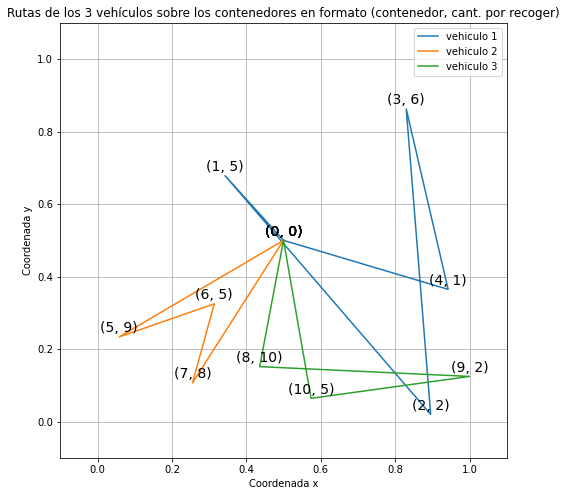

In [6]:
graficarRutas(C, K, ruta_inicial)

El costo asociado a una ruta $\sigma = (\sigma_i)_{i=1}^V$ esta dado por:

$$ C(\sigma )= \sum_{i=1}^{V} w(\sigma_i) $$

Donde $w(\sigma_i)$ es el costo asociado a la ruta del vehículo $i$ de largo $l_i$, que se calcula como:

$$ w(\sigma_i)=\sum_{j=0}^{l_i}d(\sigma_i (j),\sigma_i (j+1)) $$

en donde $d:\{1,...,N\}^{2}\rightarrow \mathbb{R}_{+}$ es la distancia euclidiana usual entre dos contenedores. 

A continuación se implementan las funciones de costo antes mencionadas.

In [27]:
# funcion que calcula el costo de la ruta de un vehiculo
def w(D, subruta): #recibe matriz D de costos y subruta del vehiculo
    l = len(subruta)-1
    return sum([D[subruta[j], subruta[j+1]] for j in range(l)])

#funcion que calcula el costo total de una ruta, sumando los costos de la subruta de cada vehículo
def c(D, ruta):
    return sum([w(D, subruta) for subruta in ruta])

Definimos que dos estados $\sigma, \sigma' \in E$ son vecinos $\sigma \sim \sigma'$ si se cumple alguna de las condiciones:

- $\sigma'$ se obtiene escogiendo las subrutas de dos vehículos $i,j \in [V]$  distintos en $\sigma$ y quitando un contenedor de la subruta $\sigma_i$ para agregarlo a la subruta $\sigma_j$ de manera factible. A este procedimiento lo llamaremos "reasignar" y esta implementado en la funcion $\textbf{reasignarContenedor}$. 


- $\sigma'$ se obtiene escogiendo la subruta de un vehículo $i \in [V]$ en $\sigma$ y permutando dos contenedores de la subruta $\sigma_i$, de manera factible. A este procedimiento lo llamaremos "intercambio interno" y esta implementado en la funcion $\textbf{interc_rutas_in}$. 


- $\sigma'$ se obtiene escogiendo las subrutas de dos vehículos $i,j \in [V]$  distintos en $\sigma$ e intercambiando un contenedor de la subruta $\sigma_i$ con un contenedor de la subruta $\sigma_j$ en el mismo orden de cada subruta, de manera factible. A este procedimiento lo llamaremos "intercambio externo" y esta implementado en la funcion $\textbf{interc_rutas_out}$. 


In [9]:
def reasignarContenedor(N,V,r):
    rutas_new = copy.deepcopy(r)
    #escogemos un vehiculo v1 que cedera su contenedor a v2
    v1 = random.randint(0,V-1)
    ruta_v1 = rutas_new[v1]
    while len(ruta_v1)<3: #checkeamos que hayan contenedores en la ruta de v1
        v1 = random.randint(0,V-1)
        ruta_v1 = rutas_new[v1]
    v2 = random.randint(0,V-1)
    while v1==v2: #checkeamos que v1 sea distinto a v2
        v2=random.randint(0,V-1)
    ruta_v2 = rutas_new[v2]
    i = random.randint(1,len(ruta_v1)-2) 
    c1 = ruta_v1.pop(i)
    ruta_v2.pop()
    ruta_v2.append(c1)
    ruta_v2.append(0)
    rutas_new[v1] = ruta_v1 
    rutas_new[v2] = ruta_v2
    
    return rutas_new

In [10]:
# intercambiar orden de ruta en un vehiculo
def interc_rutas_in(N, V, rutas):
    rutas_new = copy.deepcopy(rutas)
    #escogemos un v1 al que le cambiaremos la ruta
    v1 = random.randint(0,V-1)
    ruta_v1= copy.deepcopy(rutas_new[v1])
    while len(ruta_v1)<4: #checkeamos que hayan 2 contenedores en la ruta de v1
        v1 = random.randint(0,V-1)
        ruta_v1 = rutas_new[v1]
    
    #escogemos los contenedores que vamos a intercambiar
    c1=random.randint(1,len(ruta_v1)-2)
    c2=random.randint(1,len(ruta_v1)-2)
    while c1==c2:
        c2=random.randint(1,len(ruta_v1)-2)
        
    rutas_v1new = copy.deepcopy(ruta_v1)
    rutas_v1new[c1]=ruta_v1[c2]
    rutas_v1new[c2]=ruta_v1[c1]
    rutas_new[v1] = rutas_v1new
    return rutas_new

def interc_rutas_out(N, V, rutas):
    rutas_new = copy.deepcopy(rutas)
    #escogemos un v1 y un v2 al que le intercambiaremos la ruta
    v1 = random.randint(0,V-1)
    while len(rutas_new[v1])<3: #checkeamos que hayan 2 contenedores en la ruta de v1
        v1 = random.randint(0,V-1)
    ruta_v1= copy.deepcopy(rutas_new[v1])
    if len(ruta_v1) == N+2:
        return rutas_new
    v2 = random.randint(0,V-1)
    while v1==v2 or len(rutas_new[v2])<3:
        v2 = random.randint(0,V-1)
    ruta_v2= copy.deepcopy(rutas_new[v2])
    #escogemos los contenedores que vamos a intercambiar
    c1=random.randint(1,len(ruta_v1)-2)
    c2=random.randint(1,len(ruta_v2)-2)
    rutas_v1new = copy.deepcopy(ruta_v1)
    rutas_v2new = copy.deepcopy(ruta_v2)
    rutas_v1new[c1]=ruta_v2[c2]
    rutas_v2new[c2]=ruta_v1[c1]
    rutas_new[v1] = rutas_v1new
    rutas_new[v2] = rutas_v2new
    return rutas_new

Finalmente, la función $\textbf{cad_markov}$ implementa el método de Simulated Annealing, escogiendo aleatoriamente entre los métodos posibles para la elección de vecinos en cada iteración. Para ello, los métodos de intercambio tienen la misma medida de probabilidad que el método de reasignación. 

In [23]:
def cad_markov(e_inicial, C, D, K, cap, n, beta):#(estado inicial, V:numero de autos, K: n° contenedores, n: numero de pasos en la cadena, beta)
    N = len(C)-1
    V = len(e_inicial)
    cadena=[e_inicial]
    costos = [c(D, e_inicial)]
    e_actual=e_inicial
    for i in range(0,n):
        vecino_valido = False
        while not vecino_valido:
            al=random.randint(0, 3)
            if al<2:
                vecino=reasignarContenedor(N,V,e_actual)
            elif al==2:
                vecino=interc_rutas_in(N,V,e_actual)
            else:
                vecino=interc_rutas_out(N,V,e_actual)
            vecino_valido = validacion_ruta(vecino, K, cap)
            
        beta_n= beta(i)
        w1 = c(D, e_actual)
        w2 = c(D, vecino)
        p=np.exp(-(beta_n)*(w2-w1))
        if p>1:
            cadena.append(vecino)
            costos.append(w2)
            e_actual=vecino
        else:
            result=np.random.binomial(1, p, 1)
            if result==0:
                cadena.append(e_actual)
                costos.append(w1)
            else:
                cadena.append(vecino)
                costos.append(w2)
                e_actual=vecino
    return cadena, costos

Para probar la implementación se utilizan distintas funciones beta, entre las que se encuentran la lineal, logarítmica, cuadrática y exponencial. ALgunas funciones son ponderadas por una cota superior a la constante de oscilación $Osc(c)$, tal que:

$$ Osc(c) =\max \{w(\sigma')-w(\sigma) : \sigma \sim \sigma' \} < 4\sqrt{2} = cte $$

Pues si $\sigma'$ es vecino de $\sigma$ se alteran solo dos subrutas en una posición, por lo que $c(\sigma')$ y $c(\sigma)$ difieren solamente en 4 distancias de la definición de $c$. Poniéndonos en el peor caso posible, donde cada una de estas distancias es $\sqrt{2}$ (como son puntos en $[0,1]^{2}$), tenemos que $Osc(c) < 4\sqrt{2}$.

El modelo se implementa con los valores de $V=3$, $N=10$ y $cap$ tal que el $60 \%$ de los vehículos tengan la capacidad suficiente para transportar el contenido de todos los contenedores.

In [119]:
cte = 4*np.sqrt(2)
#funciones beta por comparar
def beta_lin_1(n):
    return n

def beta_lin_2(n):
    return n/cte

def beta_log(n):
    return (1/cte)*np.log(1+n)

def beta_cuad(n):
    return n**(2)

def beta_exp(n):
    return 3**n


## Resultados

In [154]:
# parametros fijos del modelo
V = 3
N = 10
C, D, K = contenedores(N)
cap = int(sum(K)/(0.6*V)) #el 60% de los vehiculos debe poder manejar la cantidad total de desperdicios 
ruta_inicial = iniciarRutas(V,N)
opts = []
print('Capacidad por vehículo: ', cap)

Capacidad por vehículo:  29


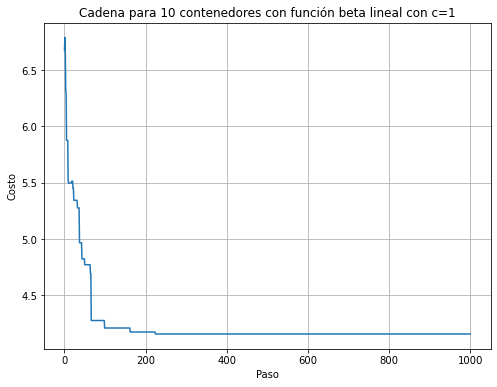

Camino en la iteración número 0


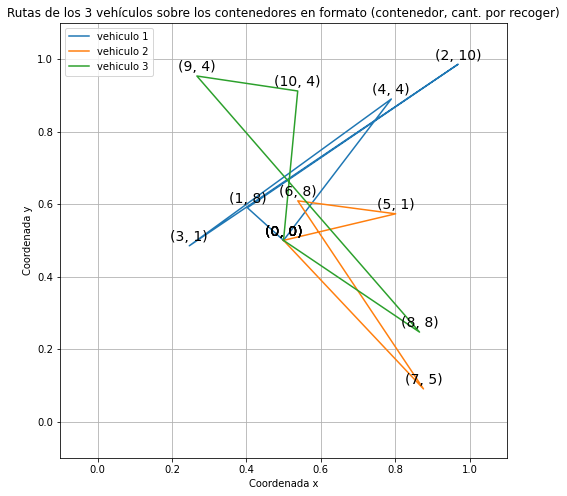

Camino en la iteración número 250


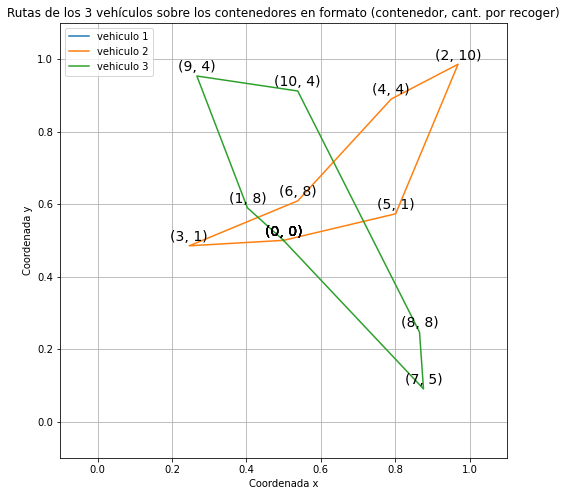

Camino en la iteración número 500


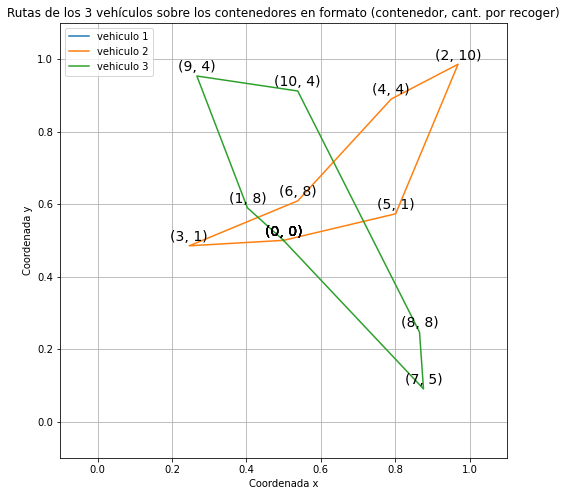

Camino en la iteración número 750


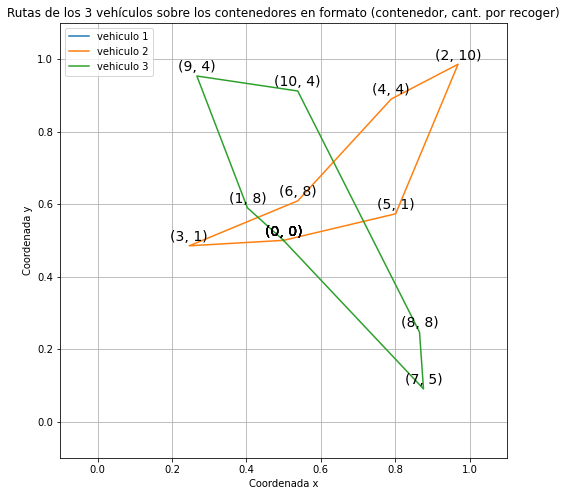

Camino en la iteración número 1000


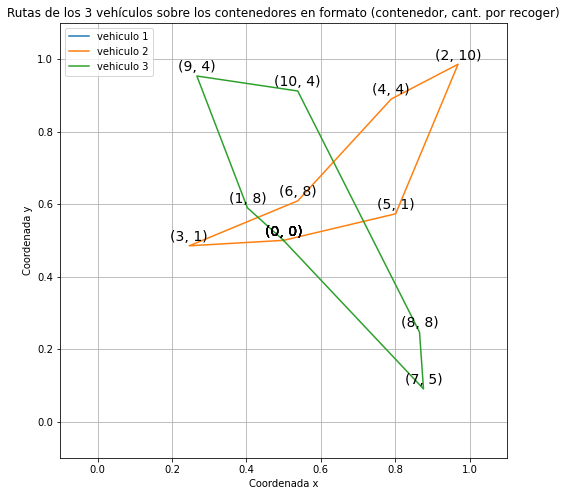

El óptimo obtenido es de 4.16


In [155]:
#funcion beta lineal con constante 1
n=1000
perms, costos = cad_markov(ruta_inicial, C, D, K, cap, n, beta_lin_1)
plt.figure(figsize=(8, 6))
plt.plot(costos)
plt.grid()
plt.title('Cadena para {} contenedores con función beta lineal con c=1'.format(N))
plt.ylabel('Costo')
plt.xlabel('Paso')
plt.show()
perms_plt = perms[0:n+1:250] 
for j in range(len(perms_plt)):
    print("Camino en la iteración número {}".format(250*j))
    graficarRutas(C,K,perms_plt[j])
opt=min(costos) 
print('El óptimo obtenido es de {}'.format(round(opt,2)))
opts.append(opt)

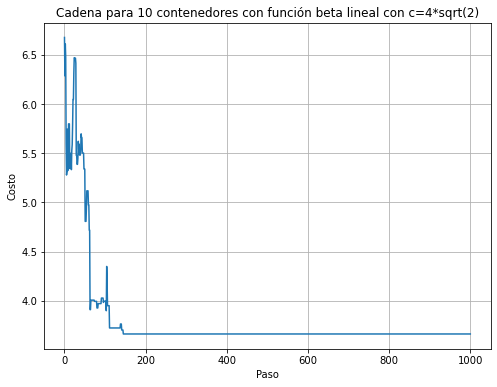

Camino en la iteración número 0


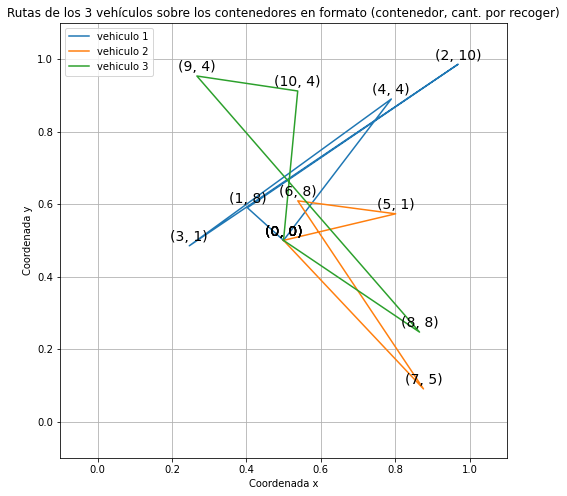

Camino en la iteración número 250


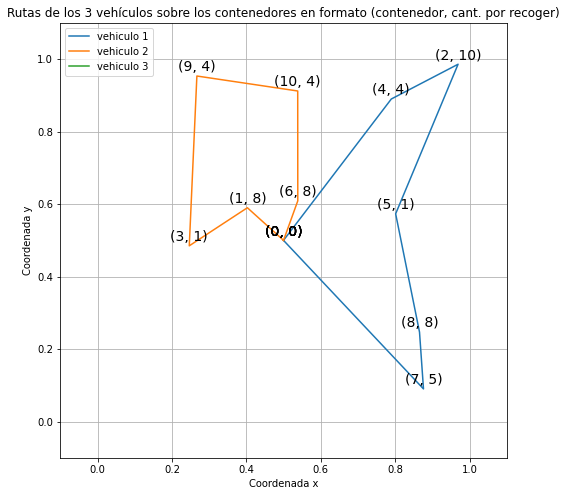

Camino en la iteración número 500


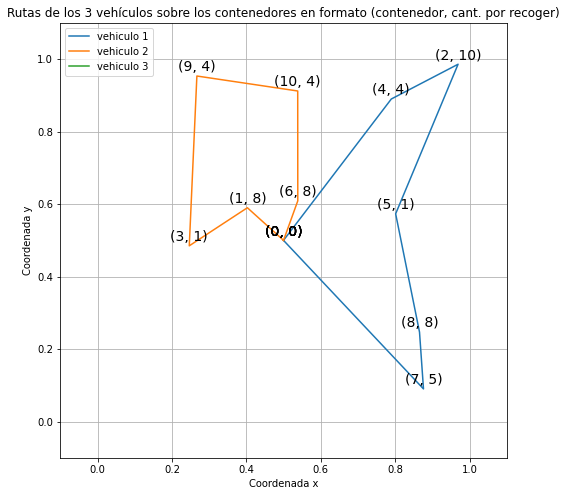

Camino en la iteración número 750


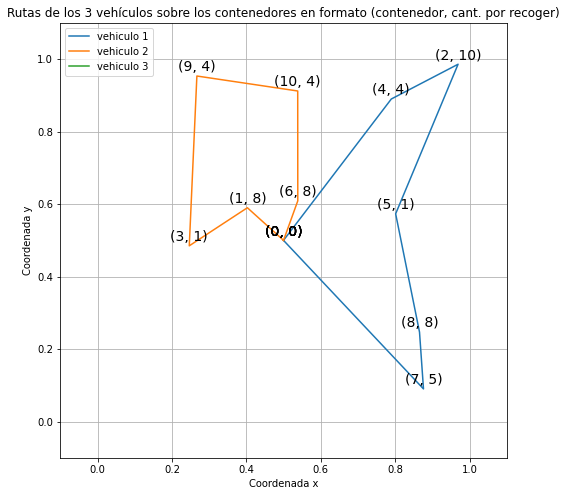

Camino en la iteración número 1000


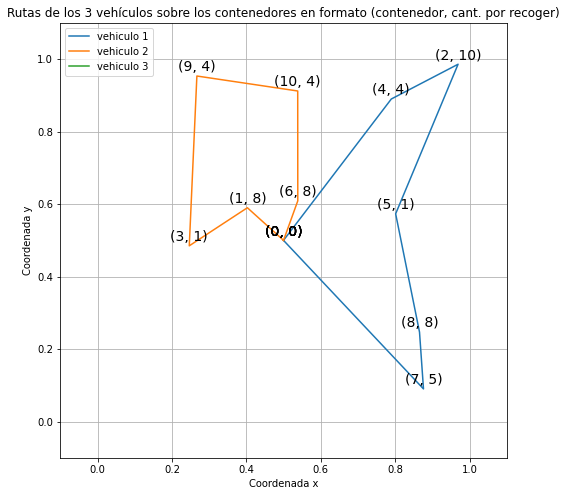

El óptimo obtenido es de 3.66


In [156]:
#funcion beta lineal con constante igual a cte
n=1000
perms, costos = cad_markov(ruta_inicial, C, D, K, cap, n, beta_lin_2)
plt.figure(figsize=(8, 6))
plt.plot(costos)
plt.grid()
plt.title('Cadena para {} contenedores con función beta lineal con c=4*sqrt(2)'.format(N))
plt.ylabel('Costo')
plt.xlabel('Paso')
plt.show()
perms_plt = perms[0:n+1:250] 
for j in range(len(perms_plt)):
    print("Camino en la iteración número {}".format(250*j))
    graficarRutas(C,K,perms_plt[j])
opt=min(costos) 
print('El óptimo obtenido es de {}'.format(round(opt,2)))
opts.append(opt)

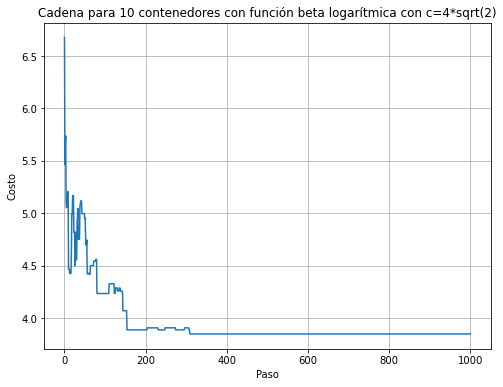

Camino en la iteración número 0


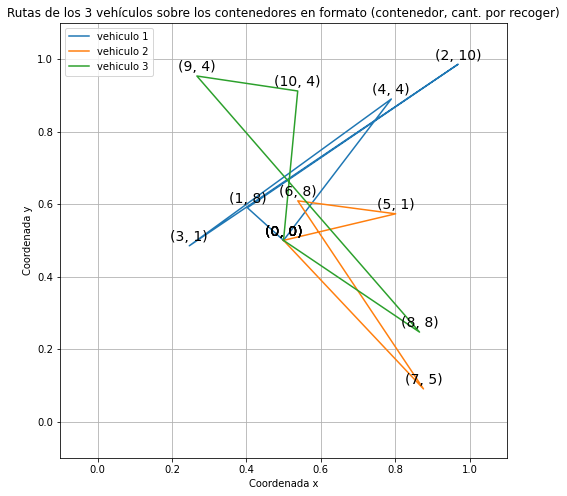

Camino en la iteración número 250


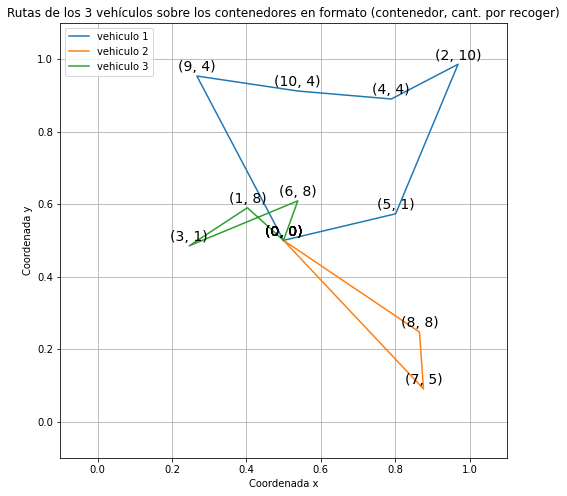

Camino en la iteración número 500


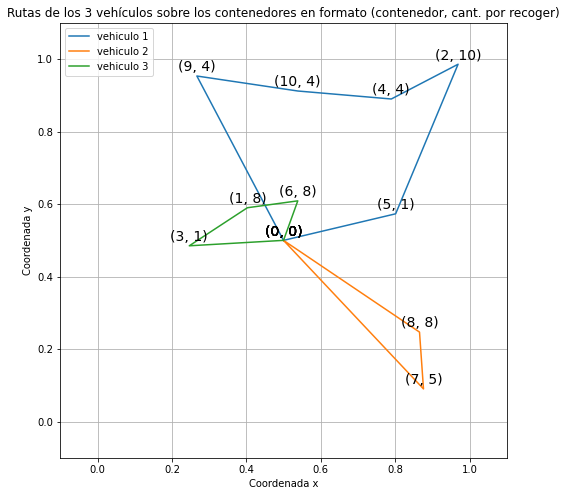

Camino en la iteración número 750


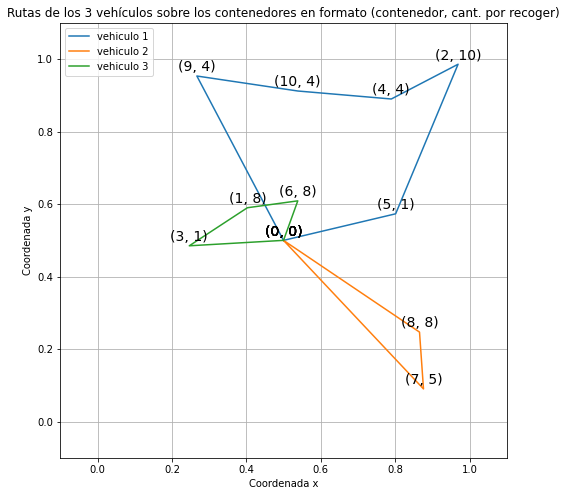

Camino en la iteración número 1000


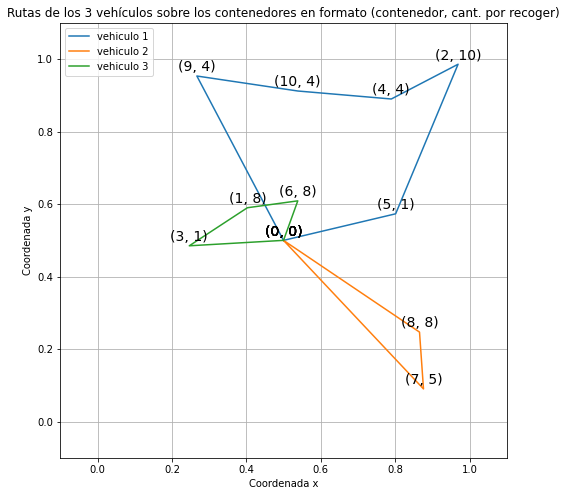

El óptimo obtenido es de 3.85


In [157]:
#funcion beta logaritmica con constante igual a cte
n=1000
perms, costos = cad_markov(ruta_inicial, C, D, K, cap, n, beta_lin_2)
plt.figure(figsize=(8, 6))
plt.plot(costos)
plt.grid()
plt.title('Cadena para {} contenedores con función beta logarítmica con c=4*sqrt(2)'.format(N))
plt.ylabel('Costo')
plt.xlabel('Paso')
plt.show()
perms_plt = perms[0:n+1:250] 
for j in range(len(perms_plt)):
    print("Camino en la iteración número {}".format(250*j))
    graficarRutas(C,K,perms_plt[j])
opt=min(costos) 
print('El óptimo obtenido es de {}'.format(round(opt,2)))
opts.append(opt)

C:\Users\vicen\AppData\Local\Temp\ipykernel_13348\361146433.py:22: RuntimeWarning: overflow encountered in exp
  p=np.exp(-(beta_n)*(w2-w1))


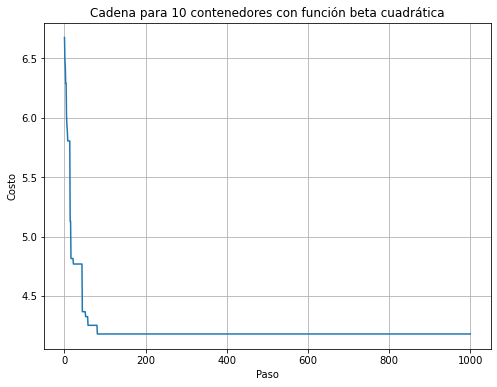

Camino en la iteración número 0


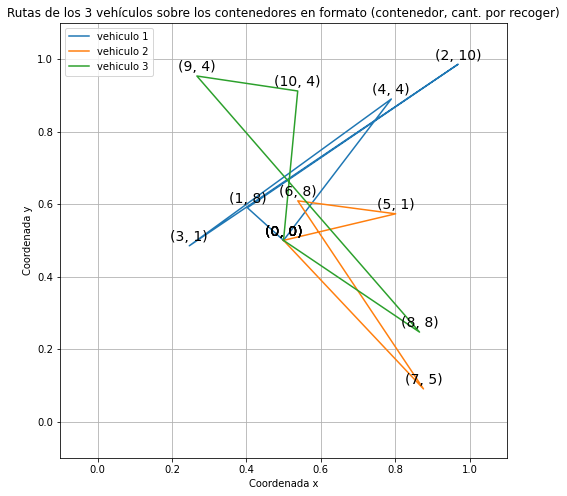

Camino en la iteración número 250


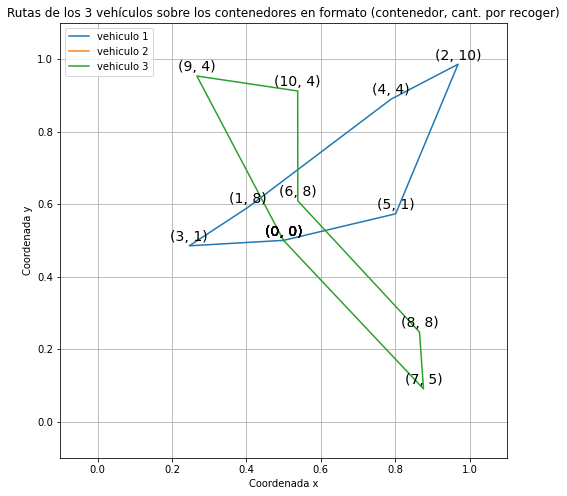

Camino en la iteración número 500


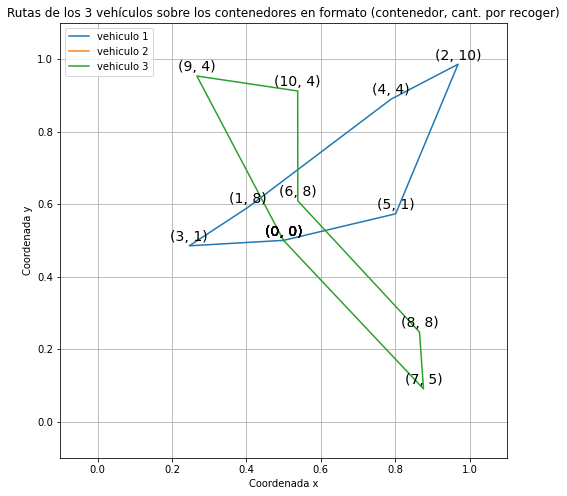

Camino en la iteración número 750


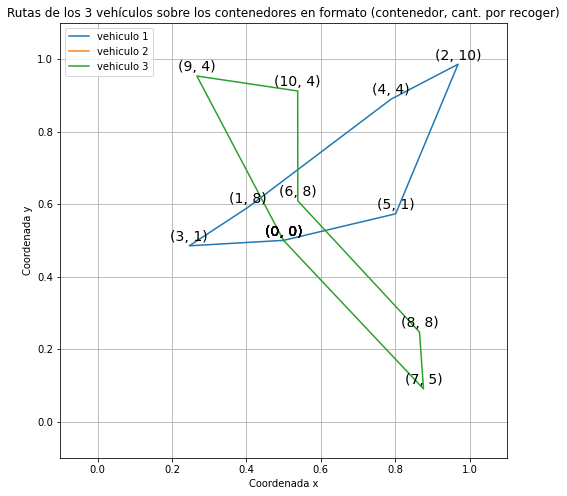

Camino en la iteración número 1000


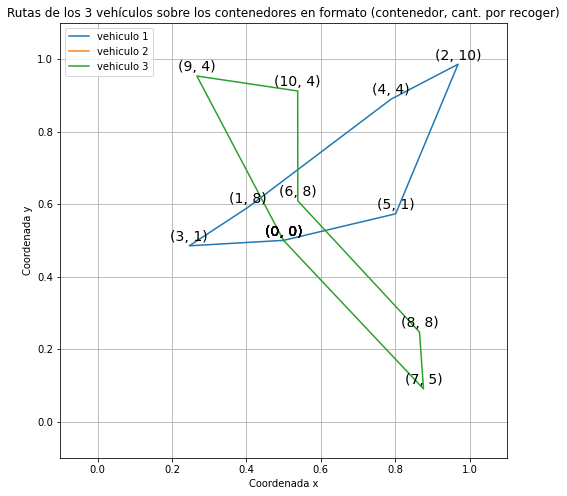

El óptimo obtenido es de 4.18


In [158]:
#funcion beta cuadratico
n=1000
perms, costos = cad_markov(ruta_inicial, C, D, K, cap, n, beta_cuad)
plt.figure(figsize=(8, 6))
plt.plot(costos)
plt.grid()
plt.title('Cadena para {} contenedores con función beta cuadrática'.format(N))
plt.ylabel('Costo')
plt.xlabel('Paso')
plt.show()
perms_plt = perms[0:n+1:250] 
for j in range(len(perms_plt)):
    print("Camino en la iteración número {}".format(250*j))
    graficarRutas(C,K,perms_plt[j])
opt=min(costos) 
print('El óptimo obtenido es de {}'.format(round(opt,2)))
opts.append(opt)

C:\Users\vicen\AppData\Local\Temp\ipykernel_13348\361146433.py:22: RuntimeWarning: overflow encountered in exp
  p=np.exp(-(beta_n)*(w2-w1))


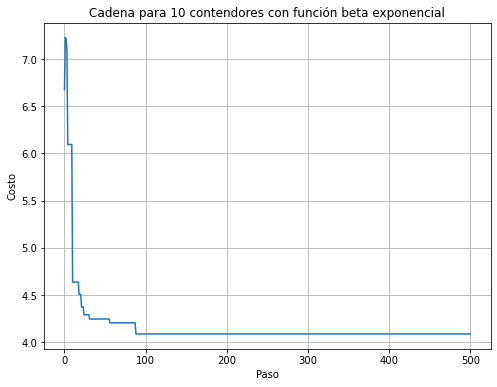

Camino en la iteración número 0


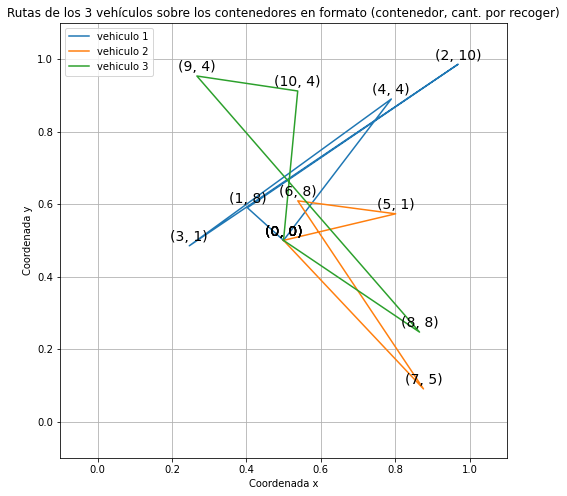

Camino en la iteración número 250


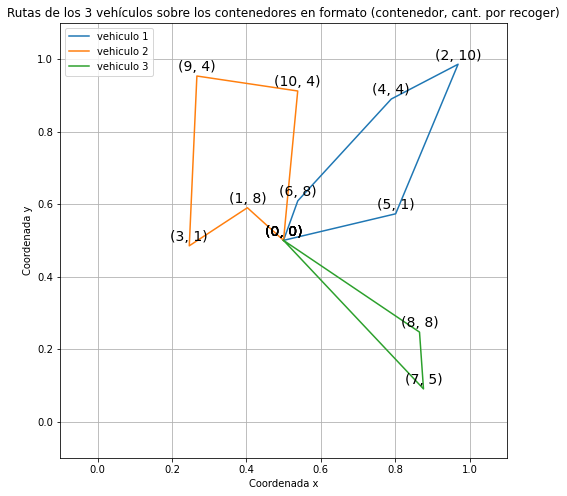

Camino en la iteración número 500


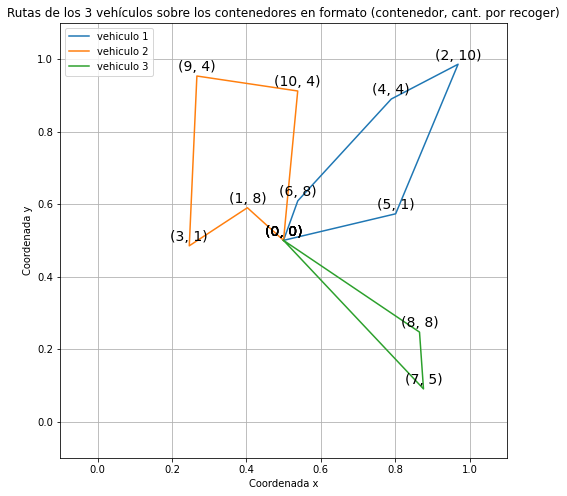

El óptimo obtenido es de 4.09


In [159]:
#funcion beta exp
n=500
perms, costos = cad_markov(ruta_inicial, C, D, K, cap, n, beta_exp)
plt.figure(figsize=(8, 6))
plt.plot(costos)
plt.grid()
plt.title('Cadena para {} contendores con función beta exponencial'.format(N))
plt.ylabel('Costo')
plt.xlabel('Paso')
plt.show()
perms_plt = perms[0:n+1:250] 
for j in range(len(perms_plt)):
    print("Camino en la iteración número {}".format(250*j))
    graficarRutas(C,K,perms_plt[j])
opt=min(costos) 
print('El óptimo obtenido es de {}'.format(round(opt,2)))
opts.append(opt)

In [160]:
import pandas as pd
d={'Función Beta': ['Lineal c=1', 'Lineal con c aprox. osc', 'Log. con c aprox. osc', 'Cuadrática', 'Exponencial'], 
   'Número de Pasos Simulados': [1000,1000,1000,1000,500],
   'Costo óptimo': opts}
df = pd.DataFrame(data=d)
df

,Función Beta,Número de Pasos Simulados,Costo óptimo
0,Lineal c=1,1000,4.156691
1,Lineal con c aprox. osc,1000,3.663623
2,Log. con c aprox. osc,1000,3.848365
3,Cuadrática,1000,4.179567
4,Exponencial,500,4.087801


Se implementan versiones alternativas del algoritmo anterior. 
- $\textbf{cad_markov_sin_reasignar}$ solo considera vecinos por intercambio.
- $\textbf{cad_markov_sin_intercambiar}$ solo considera vecinos por reasignación.

In [166]:
def cad_markov_sin_reasignar(e_inicial, C, D, K, cap, n, beta):#(estado inicial, V:numero de autos, K: n° contenedores, n: numero de pasos en la cadena, beta)
    N = len(C)-1
    V = len(e_inicial)
    cadena=[e_inicial]
    costos = [c(D, e_inicial)]
    e_actual=e_inicial
    for i in range(0,n):
        vecino_valido = False
        while not vecino_valido:
            al=random.randint(0,1)
            if al==0:
                vecino=interc_rutas_in(N,V,e_actual)
            else:
                vecino=interc_rutas_out(N,V,e_actual)
            vecino_valido = validacion_ruta(vecino, K, cap)
            
        beta_n= beta(i)
        w1 = c(D, e_actual)
        w2 = c(D, vecino)
        p=np.exp(-(beta_n)*(w2-w1))
        if p>1:
            cadena.append(vecino)
            costos.append(w2)
            e_actual=vecino
        else:
            result=np.random.binomial(1, p, 1)
            if result==0:
                cadena.append(e_actual)
                costos.append(w1)
            else:
                cadena.append(vecino)
                costos.append(w2)
                e_actual=vecino
    return cadena, costos

def cad_markov_sin_intercambiar(e_inicial, C, D, K, cap, n, beta):#(estado inicial, V:numero de autos, K: n° contenedores, n: numero de pasos en la cadena, beta)
    N = len(C)-1
    V = len(e_inicial)
    cadena=[e_inicial]
    costos = [c(D, e_inicial)]
    e_actual=e_inicial
    for i in range(0,n):
        vecino_valido = False
        while not vecino_valido:
            vecino = vecino=reasignarContenedor(N,V,e_actual)
            vecino_valido = validacion_ruta(vecino, K, cap)
    
        beta_n= beta(i)
        w1 = c(D, e_actual)
        w2 = c(D, vecino)
        p=np.exp(-(beta_n)*(w2-w1))
        if p>1:
            cadena.append(vecino)
            costos.append(w2)
            e_actual=vecino
        else:
            result=np.random.binomial(1, p, 1)
            if result==0:
                cadena.append(e_actual)
                costos.append(w1)
            else:
                cadena.append(vecino)
                costos.append(w2)
                e_actual=vecino
    return cadena, costos


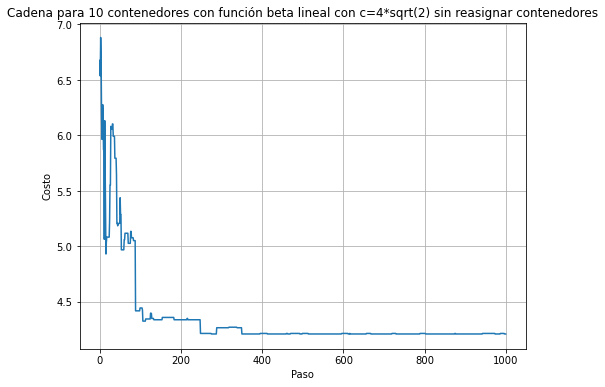

Camino en la iteración número 0


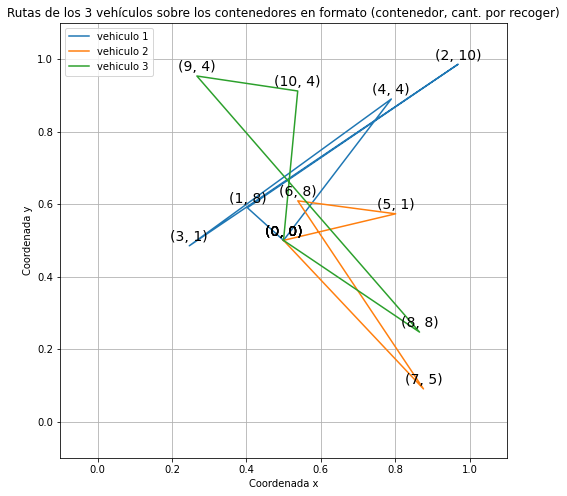

Camino en la iteración número 250


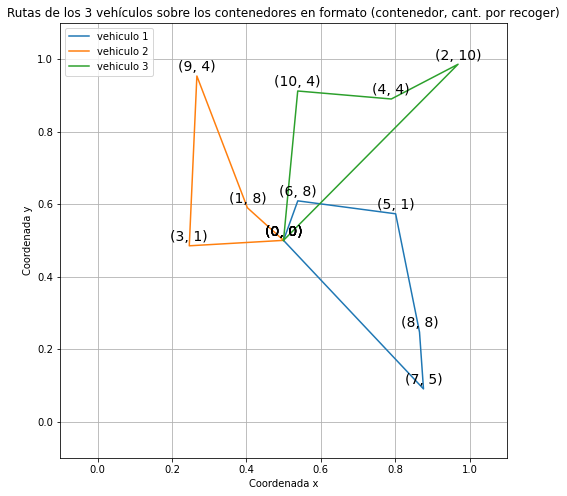

Camino en la iteración número 500


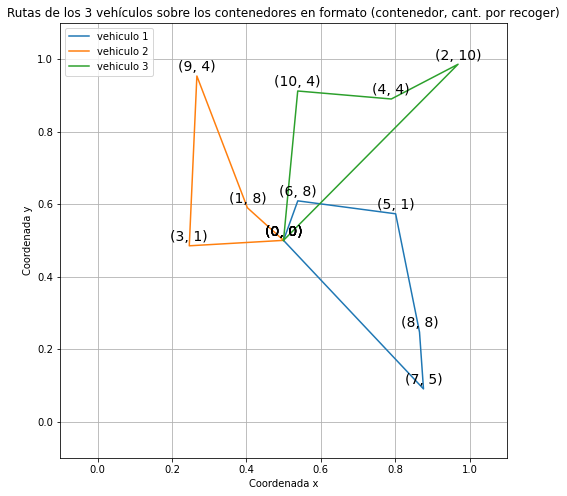

Camino en la iteración número 750


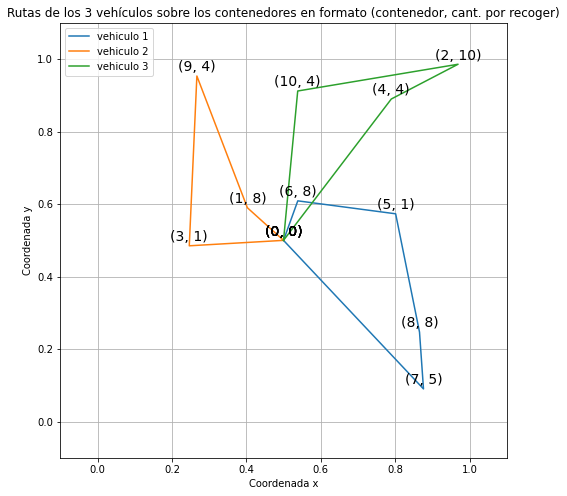

Camino en la iteración número 1000


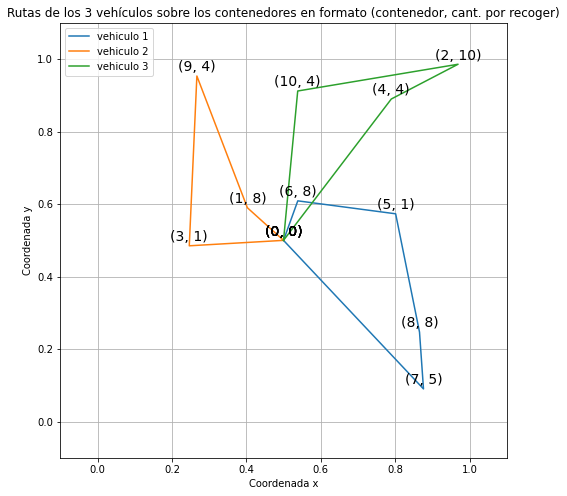

El óptimo obtenido es de 4.21


In [173]:
opts2 = [opts[1]]
#funcion beta lineal con constante igual a cte
n=1000
perms, costos = cad_markov_sin_reasignar(ruta_inicial, C, D, K, cap, n, beta_lin_2)
plt.figure(figsize=(8, 6))
plt.plot(costos)
plt.grid()
plt.title('Cadena para {} contenedores con función beta lineal con c=4*sqrt(2) sin reasignar contenedores'.format(N))
plt.ylabel('Costo')
plt.xlabel('Paso')
plt.show()
perms_plt = perms[0:n+1:250] 
for j in range(len(perms_plt)):
    print("Camino en la iteración número {}".format(250*j))
    graficarRutas(C,K,perms_plt[j])
opt=min(costos) 
print('El óptimo obtenido es de {}'.format(round(opt,2)))
opts2.append(opt)

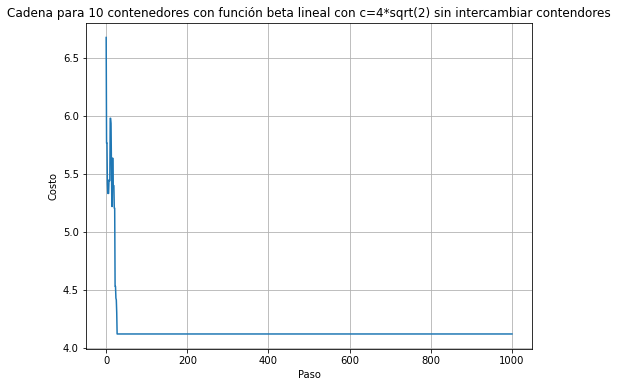

Camino en la iteración número 0


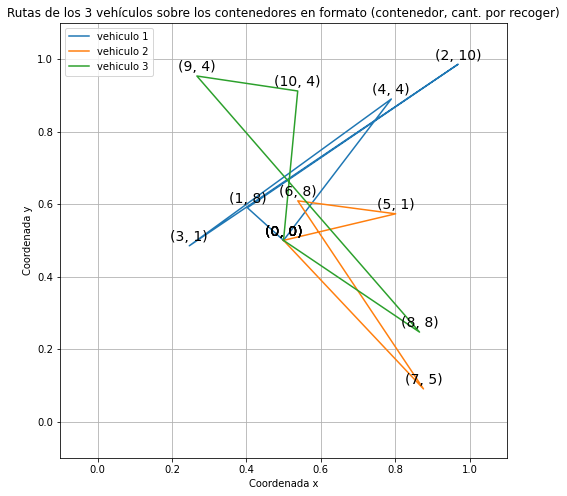

Camino en la iteración número 250


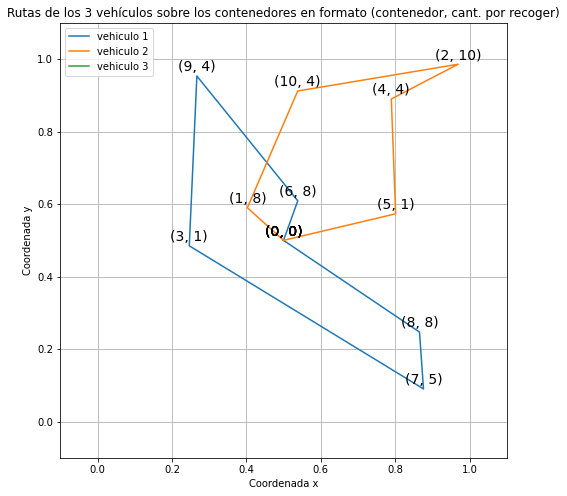

Camino en la iteración número 500


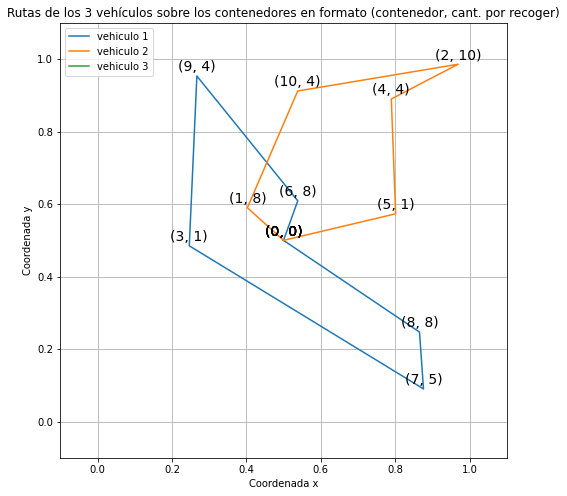

Camino en la iteración número 750


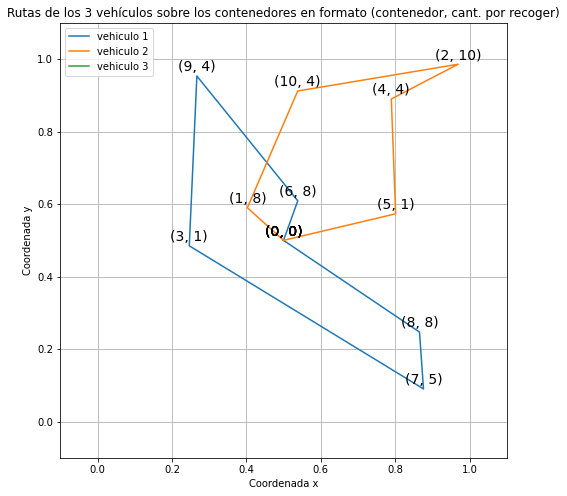

Camino en la iteración número 1000


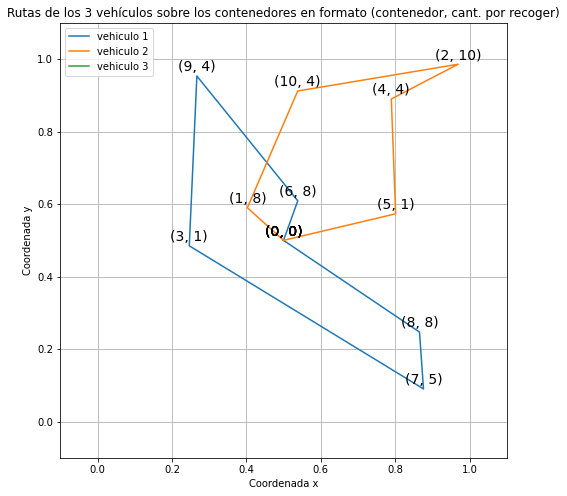

El óptimo obtenido es de 4.12


In [174]:
#funcion beta lineal con constante igual a cte
n=1000
perms, costos = cad_markov_sin_intercambiar(ruta_inicial, C, D, K, cap, n, beta_lin_2)
plt.figure(figsize=(8, 6))
plt.plot(costos)
plt.grid()
plt.title('Cadena para {} contenedores con función beta lineal con c=4*sqrt(2) sin intercambiar contendores'.format(N))
plt.ylabel('Costo')
plt.xlabel('Paso')
plt.show()
perms_plt = perms[0:n+1:250] 
for j in range(len(perms_plt)):
    print("Camino en la iteración número {}".format(250*j))
    graficarRutas(C,K,perms_plt[j])
opt=min(costos) 
print('El óptimo obtenido es de {}'.format(round(opt,2)))
opts2.append(opt)

In [175]:
import pandas as pd
d={'Vecinos en el algoritmo': ['Con ambos tipos de vecino', 'Sin reasignar', 'Sin intercambiar'], 
   'Número de Pasos Simulados': [1000,1000,1000],
   'Costo óptimo': opts2}
df = pd.DataFrame(data=d)
df

,Vecinos en el algoritmo,Número de Pasos Simulados,Costo óptimo
0,Con ambos tipos de vecino,1000,3.663623
1,Sin reasignar,1000,4.211070
2,Sin intercambiar,1000,4.117848


## Conclusiones

Se obtiene el mejor óptimo para la función de costos usando una función beta lineal con
la constante de oscilación calculada. 

Además, se observa que es necesario utilizar todas
las formas de encontrar vecinos para obtener un
mejor óptimo, siendo más fundamental el vecino por
reasignación.

## Referencias 

1. Fermani, M., Rossit, D.G., Toncovich, A. (2021).ASimulatedAnnealingAlgorithmfor SolvingaRoutingProblemintheContextof Municipal SolidWasteCollection. In:Rossit, D.A., Tohm´ e, F.,Mej´ ıaDelgadillo, G. (eds) Production Research. ICPR-Americas 2020. CommunicationsinComputerandInformation Science,vol1408.Springer,Cham.

2. Apuntes del curso.